# Data Analysis and Visualization

In [3]:
# Import required libraries 
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Define columns of interest
all_columns = ['id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'key', 'liveness', 'loudness', 'mode', 'speechiness', 
                  'tempo', 'time_signature', 'valence', 'name', 'artist', 'genre']
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'key', 'liveness', 'loudness', 'mode', 'speechiness', 
                  'tempo', 'time_signature', 'valence']

# Define color mapping for each genre
genre_color_map = {
    'Pop': 'mediumseagreen',
    'Hip-Hop': '#acb2bf',
    'Viral': '#c678dd'
}

# Load collected dataset from CSV file
spotify_data = pd.read_csv('spotify_api_data.csv')
spotify_data.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,name,artist,genre
0,4OMJGnvZfDvsePyCwRGO7X,0.0036,0.744,0.789,0.001440,9,0.0947,-4.876,0,0.0590,116.985,4,0.866,Houdini,Dua Lipa,Pop
1,3rUGC1vUpkDG9CZFHMur1t,0.2560,0.750,0.733,0.000000,6,0.1140,-3.180,0,0.0319,111.018,1,0.844,greedy,Tate McRae,Pop
2,5aIVCx5tnk0ntmdiinnYvw,0.0856,0.673,0.722,0.000000,3,0.1370,-3.495,0,0.0755,117.187,4,0.519,Water,Tyla,Pop
3,7dJYggqjKo71KI9sLzqCs8,0.2280,0.750,0.674,0.000089,8,0.1220,-6.128,0,0.0970,123.026,4,0.392,Agora Hills,Doja Cat,Pop
4,2KslE17cAJNHTsI2MI0jb2,0.0447,0.711,0.809,0.000000,2,0.3390,-4.389,0,0.0955,106.017,4,0.816,Standing Next to You,Jung Kook,Pop


In [5]:
'''
Comparative Descriptive Analysis
'''
# Split dataset into smaller datasets grouped by 'genre'
viral_data = spotify_data[spotify_data['genre'] == 'Viral']
viral_audio_data = viral_data[audio_features]

other_data = spotify_data[spotify_data['genre'] != 'Viral']
other_audio_data = other_data[audio_features] 

pop_data = spotify_data[spotify_data['genre'] == 'Pop'] 
pop_audio_data = pop_data[audio_features] 

hiphop_data = spotify_data[spotify_data['genre'] == 'Hip-Hop'] 
hiphop_audio_data = hiphop_data[audio_features] 


# Compute descriptive statistics of each genre group
viral_audio_stats = viral_audio_data.describe().loc[['mean', 'std']] 
other_audio_stats = other_audio_data.describe().loc[['mean', 'std']]
pop_audio_stats = pop_audio_data.describe().loc[['mean', 'std']] 
hiphop_audio_stats = hiphop_audio_data.describe().loc[['mean', 'std']] 


# Compare the descriptive statistics of the 'Viral' genre with other genres
viral_vs_other_stats = viral_audio_stats - other_audio_stats
viral_vs_pop_stats = viral_audio_stats - pop_audio_stats
viral_vs_hiphop_stats = viral_audio_stats - hiphop_audio_stats


# Sort the comparative statistics for easier interpretation 
viral_vs_other_stats_T = viral_vs_other_stats.T
viral_vs_other_stats_sorted = viral_vs_other_stats_T.reindex(viral_vs_other_stats_T['mean'].abs().sort_values(ascending=False).index)

viral_vs_pop_stats_T = viral_vs_pop_stats.T
viral_vs_pop_stats_sorted = viral_vs_pop_stats_T.reindex(viral_vs_pop_stats_T['mean'].abs().sort_values(ascending=False).index)

viral_vs_hiphop_stats_T = viral_vs_hiphop_stats.T
viral_vs_hiphop_stats_sorted = viral_vs_hiphop_stats_T.reindex(viral_vs_hiphop_stats_T['mean'].abs().sort_values(ascending=False).index)


# Display results
print('Viral vs Other genres')
display(viral_vs_other_stats_sorted)

print('Viral vs Pop')
display(viral_vs_pop_stats_sorted)

print('Viral vs HipHop')
display(viral_vs_hiphop_stats_sorted)

Viral vs Other genres


,mean,std
tempo,-2.243648,0.436465
key,0.537021,-0.120558
loudness,-0.331071,0.575258
instrumentalness,0.041483,0.107623
speechiness,-0.028249,-0.016016
mode,-0.021789,0.005941
time_signature,-0.021789,0.044853
valence,0.018328,0.023584
acousticness,0.014661,0.009676
liveness,0.010493,0.021459


Viral vs Pop


,mean,std
tempo,1.003508,-1.036049
loudness,-0.332631,0.330845
key,-0.146634,-0.029489
danceability,0.061681,-0.009780
acousticness,-0.061200,-0.025159
speechiness,0.057230,0.047737
time_signature,0.041872,0.019091
instrumentalness,0.031162,0.079736
liveness,0.011583,0.013639
mode,-0.010355,0.002328


Viral vs HipHop


,mean,std
tempo,-5.229381,2.154625
key,1.165636,-0.103694
loudness,-0.329636,0.820214
speechiness,-0.106846,-0.011870
acousticness,0.084415,0.073350
time_signature,-0.080326,0.081817
danceability,-0.058479,0.001648
instrumentalness,0.050973,0.151142
valence,0.033777,0.030924
mode,-0.032303,0.008495


Based on these observations, the most distinctive features of the 'Viral' genre seem to be a combination of tempo, key, loudness, and speechiness. To illustrate the clustering of the different genres based on these features, I will create a pairplot to create a scatterplot matrix between each pair of the identified features.

<Figure size 1000x800 with 0 Axes>

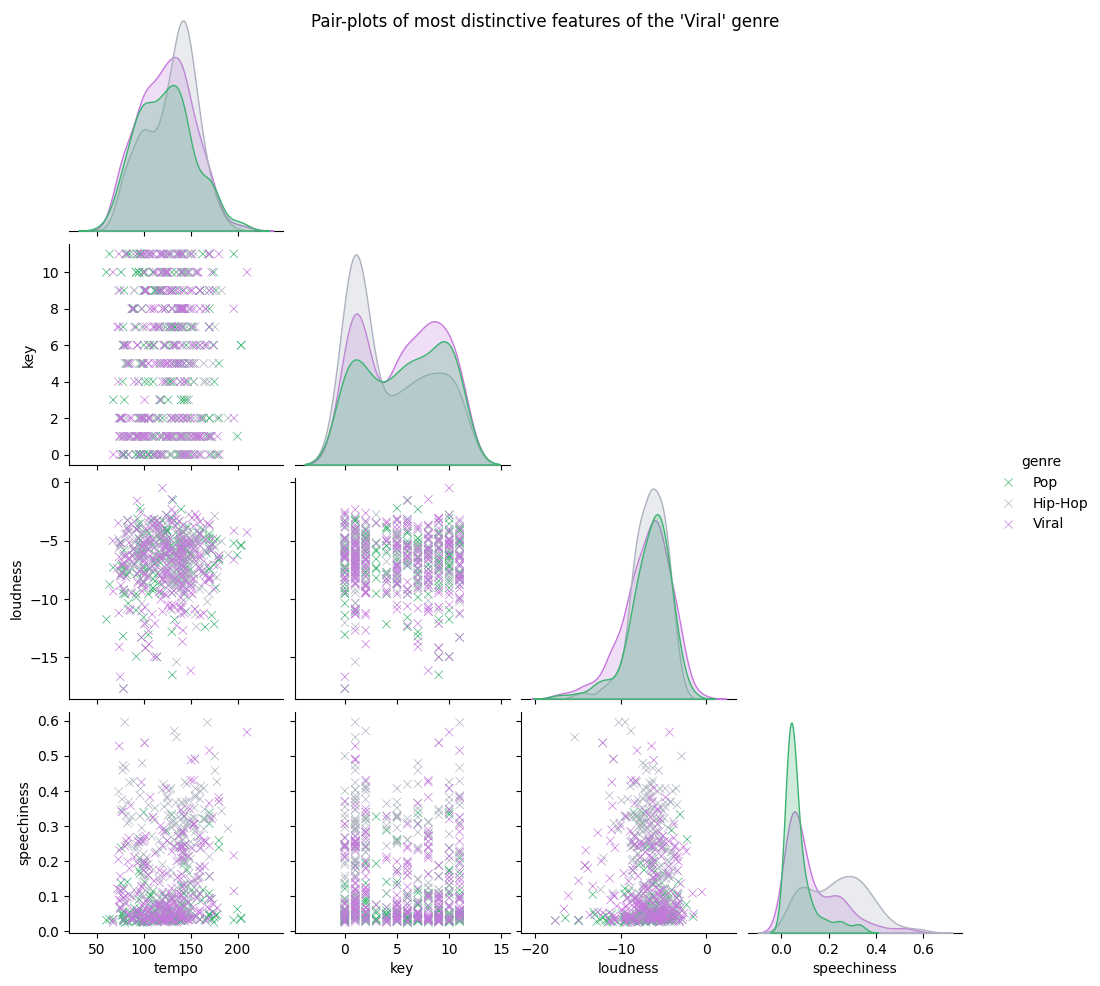

In [9]:
''' 
Pair-plots for most distinctive features of the 'Viral' genre 
'''
# Selecting key features for the plot
features_to_plot = ['tempo', 'key', 'loudness', 'speechiness']

# Creating a pairplot
plt.figure(figsize=(10, 8))
pair_plot = sns.pairplot(spotify_data, hue='genre', vars=features_to_plot, markers='x', palette=genre_color_map, corner=True)
pair_plot.fig.suptitle('Pair-plots of most distinctive features of the \'Viral\' genre')
plt.show()

### Applying Principal Component Analysis (PCA)

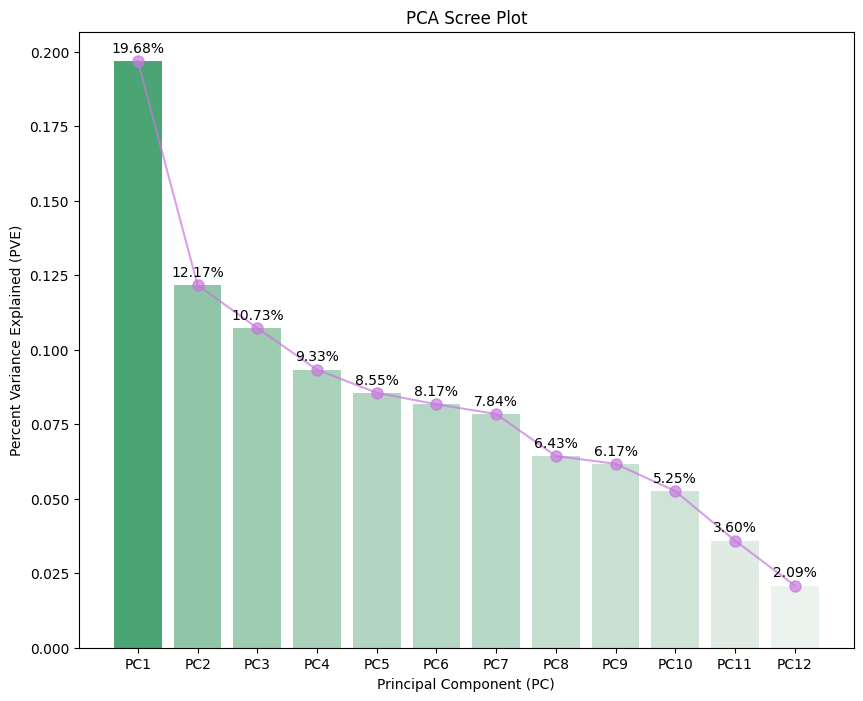

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
PC1,0.406799,-0.332559,-0.526605,0.164462,0.045624,-0.069276,-0.493734,0.049503,-0.135709,-0.137082,-0.095911,-0.346477
PC2,0.183858,-0.166657,0.214152,0.204711,0.476021,0.038711,0.205642,-0.386444,-0.484363,-0.021462,-0.410263,0.165975
PC3,0.128882,0.499862,-0.190150,0.183472,0.262633,-0.327071,-0.322845,-0.308973,0.303692,-0.027387,0.069429,0.436194
PC4,0.187548,0.239427,-0.014898,-0.115482,-0.341921,-0.148782,0.072478,0.346013,-0.303533,-0.606751,-0.259466,0.319871
PC5,-0.288031,-0.080717,0.182954,0.602467,-0.074585,-0.577254,-0.004435,0.208885,-0.261684,0.047022,0.229627,-0.090711
PC6,0.140565,0.041762,-0.034587,0.062940,-0.163143,-0.140093,-0.013820,0.346598,0.124978,0.641530,-0.598552,0.146059
PC7,-0.078765,0.111787,0.061185,0.633939,0.001079,0.670625,-0.137959,0.225881,0.139580,-0.136847,-0.059344,0.118963
PC8,-0.564092,0.289905,-0.186024,-0.109989,0.393918,-0.069809,-0.039064,0.147856,0.037188,-0.201896,-0.420328,-0.385747
PC9,0.171737,-0.141032,0.048816,-0.175179,0.626023,-0.014323,0.024528,0.625391,0.017682,0.025072,0.288443,0.222663
PC10,0.105092,-0.417521,0.241089,0.120355,0.035719,-0.236971,0.178185,-0.031735,0.671773,-0.370333,-0.248730,-0.039275


In [12]:
'''
Applying PCA using the scikit-learn library 
'''
# Import required libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting only the audio features for PCA
audio_data = spotify_data[audio_features]

# Standardizing the data
scaler = StandardScaler()
audio_data_scaled = scaler.fit_transform(audio_data)

# Fitting the PCA model
pca = PCA(n_components=len(audio_features))  
audio_data_pca = pca.fit_transform(audio_data_scaled)

# Plotting the explained variance ratio of each principal component
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=[f"PC{i}" for i in range(1, len(audio_features) + 1)],
                 y=pca.explained_variance_ratio_, hue=pca.explained_variance_ratio_,
                 palette=sns.light_palette('mediumseagreen', as_cmap=True),
                 legend=False)

# Add a line plot to visualize the 'elbow'
plt.plot(pca.explained_variance_ratio_, marker='o', color='#c678dd', alpha=0.7, linestyle='-', markersize=8)

# Offset for text labels to avoid overlap with the line plot markers
label_offset = max(pca.explained_variance_ratio_) * 0.01  # 1% of the max PVE

# Add PVE labels on each bar 
for p in barplot.patches:
    barplot.text(x=(p.get_x() + p.get_width() / 2.), y=(p.get_height()+label_offset), s='{:.2%}'.format(p.get_height()), ha="center", va="bottom")

# Add plot labels
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component (PC)')
plt.ylabel('Percent Variance Explained (PVE)')
plt.savefig('images/pca_scree_plot.png')
plt.show()

# Displaying the PCA components and loading for each feature
pca_components = pd.DataFrame(pca.components_, columns=audio_features, index=[f"PC{i}" for i in range(1, len(audio_features) + 1)])
pca_components

In [1]:
'''
Plotting the PCA distribution for tracks across genres 
'''
# Adding PCA results back to the dataframe
spotify_data['PC1'] = audio_data_pca[:, 0]
spotify_data['PC2'] = audio_data_pca[:, 1]

# Set up plot figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plotting the main scatterplot with all genres
sns.scatterplot(ax=axes[0, 1], data=spotify_data, x='PC1', y='PC2', hue='genre', palette=genre_color_map, s=80, alpha=0.7)
axes[0, 1].set_title('PCA Distribution - All Genres')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

# Hide the empty plots at the sides of the main plot
axes[0, 0].axis('off')
axes[0, 2].axis('off')

# Plot the scatterplots of each genre separately 
for i, genre in enumerate(genre_color_map.keys()):
    # Filter the data for the genre
    genre_data = spotify_data[spotify_data['genre'] == genre]
    
    # Create a scatter plot for the genre in the bottom row
    sns.scatterplot(ax=axes[1, i], data=genre_data, x='PC1', y='PC2', hue='genre', palette=genre_color_map, s=80, alpha=0.7, legend=False)
    axes[1, i].set_title(f"PCA Distribution - {genre} Genre")
    axes[1, i].set_xlabel('PC1')
    axes[1, i].set_ylabel('PC2')

plt.tight_layout()
plt.savefig('images/pca_scatterplot.png')
plt.show()

NameError: name 'audio_data_pca' is not defined

### Applying t-SNE

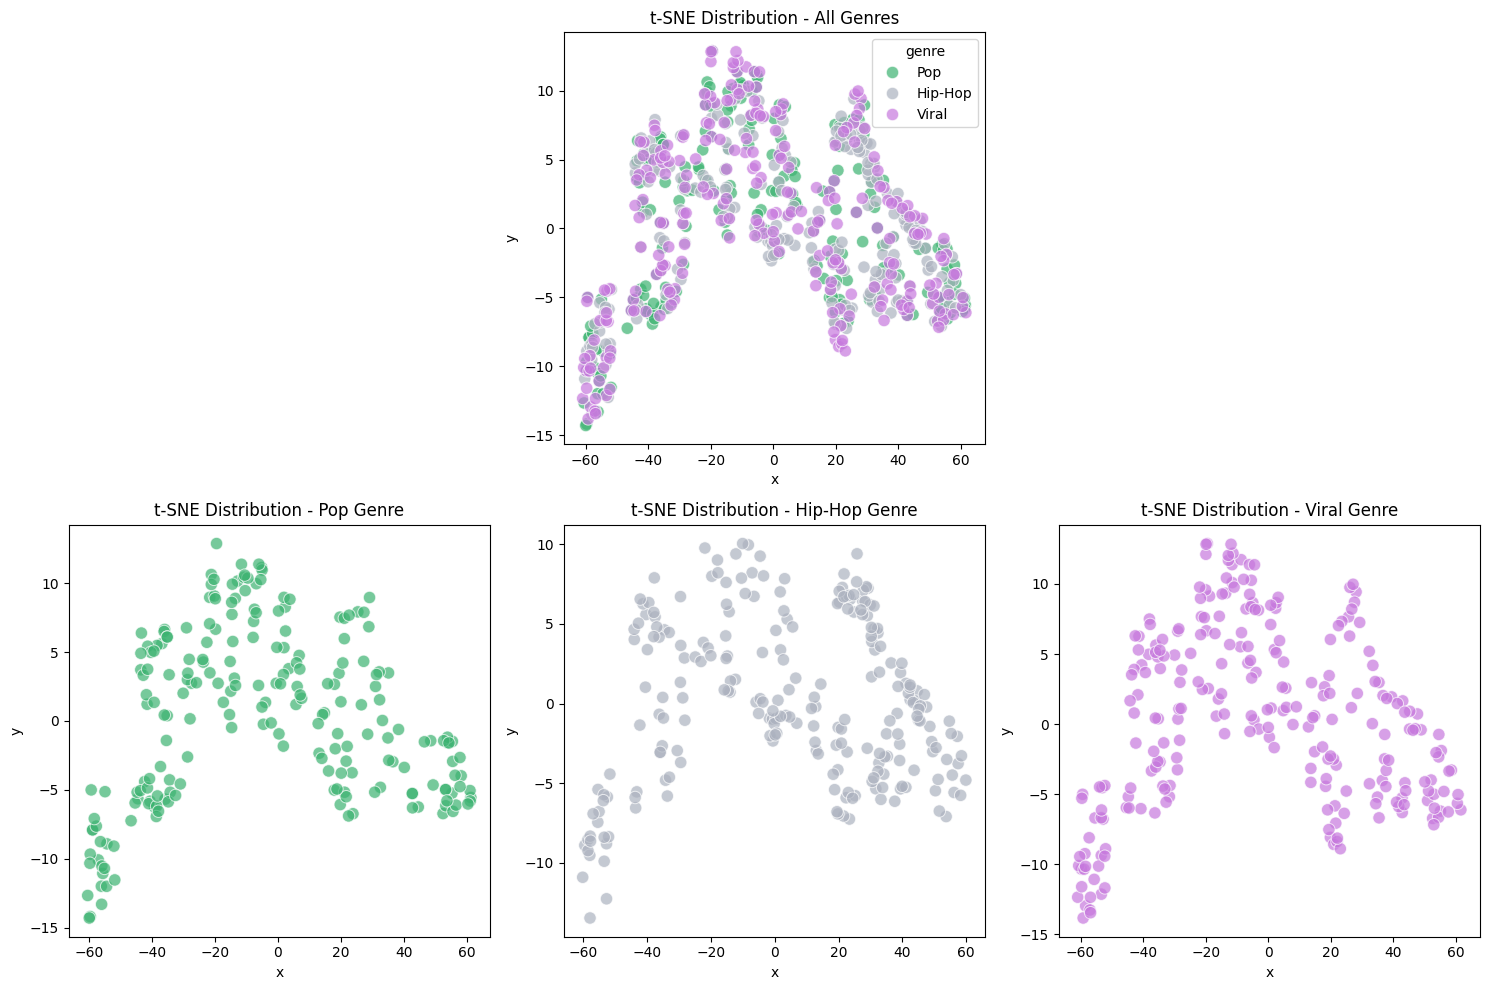

In [14]:
'''
Applying t-SNE using the scikit-learn library 
'''
# Import required library
from sklearn.manifold import TSNE

# Fitting the t-SNE model
tsne = TSNE(n_components=2, random_state=0)
tsne_features = tsne.fit_transform(audio_data)

# Add t-SNE feature data to dataframe
spotify_data['tsne_x'] = tsne_features[:,0]
spotify_data['tsne_y'] = tsne_features[:,1]

# Set up plot figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plotting the main scatterplot with all genres
sns.scatterplot(ax=axes[0, 1], data=spotify_data, x='tsne_x', y='tsne_y', hue='genre', palette=genre_color_map, s=80, alpha=0.7)
axes[0, 1].set_title('t-SNE Distribution - All Genres')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

# Hide the empty plots at the sides of the main plot
axes[0, 0].axis('off')
axes[0, 2].axis('off')

# Plot the scatterplots of each genre separately 
for i, genre in enumerate(genre_color_map.keys()):
    # Filter the data for the genre
    genre_data = spotify_data[spotify_data['genre'] == genre]
    
    # Create a scatter plot for the genre in the bottom row
    sns.scatterplot(ax=axes[1, i], data=genre_data, x='tsne_x', y='tsne_y', hue='genre', palette=genre_color_map, s=80, alpha=0.7, legend=False)
    axes[1, i].set_title(f"t-SNE Distribution - {genre} Genre")
    axes[1, i].set_xlabel('x')
    axes[1, i].set_ylabel('y')

plt.tight_layout()
plt.savefig('images/tsne_scatterplot.png')
plt.show()